In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gs=pd.read_csv('grand_slams.csv')
gs=gs.drop(columns=['tournament_date'])
gs['count']=1
gs.head()

,year,grand_slam,name,rolling_win_count,gender,count
0,1968,australian_open,Billie Jean King,1,Female,1
1,1968,french_open,Nancy Richey,1,Female,1
2,1968,wimbledon,Billie Jean King,2,Female,1
3,1968,us_open,Virginia Wade,1,Female,1
4,1969,australian_open,Margaret Court,1,Female,1


In [3]:
gs.sort_values(by=['year'],ascending=False)

,year,grand_slam,name,rolling_win_count,gender,count
421,2019,us_open,Rafael Nadal,19,Male,1
208,2019,french_open,Ashleigh Barty,1,Female,1
418,2019,australian_open,Novak Djokovic,15,Male,1
210,2019,us_open,Bianca Andreescu,1,Female,1
209,2019,wimbledon,Simona Halep,2,Female,1
...,...,...,...,...,...,...
212,1968,french_open,Ken Rosewall,1,Male,1
1,1968,french_open,Nancy Richey,1,Female,1
3,1968,us_open,Virginia Wade,1,Female,1
2,1968,wimbledon,Billie Jean King,2,Female,1


In [16]:
men=gs.loc[gs.gender=='Male']
men=men.groupby(['name']).sum()
men=men.reset_index()
men=men.drop(columns=['year','rolling_win_count'])
men=men.sort_values(by=['count'])
men=men.reset_index()
men=men.drop(columns=['index'])
men.name=men.name.str.upper()
men=men[-5:]

women=gs.loc[gs.gender=='Female']
women=women.groupby(['name']).sum()
women=women.reset_index()
women=women.drop(columns=['year','rolling_win_count'])
women=women.sort_values(by=['count'])
women=women.reset_index()
women=women.drop(columns=['index'])
women.name=women.name.str.upper()
women=women[-5:]

In [17]:
display(men)
women.head()

,name,count
50,BJÖRN BORG,12
51,PETE SAMPRAS,14
52,NOVAK DJOKOVIC,16
53,RAFAEL NADAL,19
54,ROGER FEDERER,20


,name,count
47,MARGARET COURT,11
48,MARTINA NAVRATILOVA,18
49,CHRIS EVERT,19
50,STEFFI GRAF,22
51,SERENA WILLIAMS,23


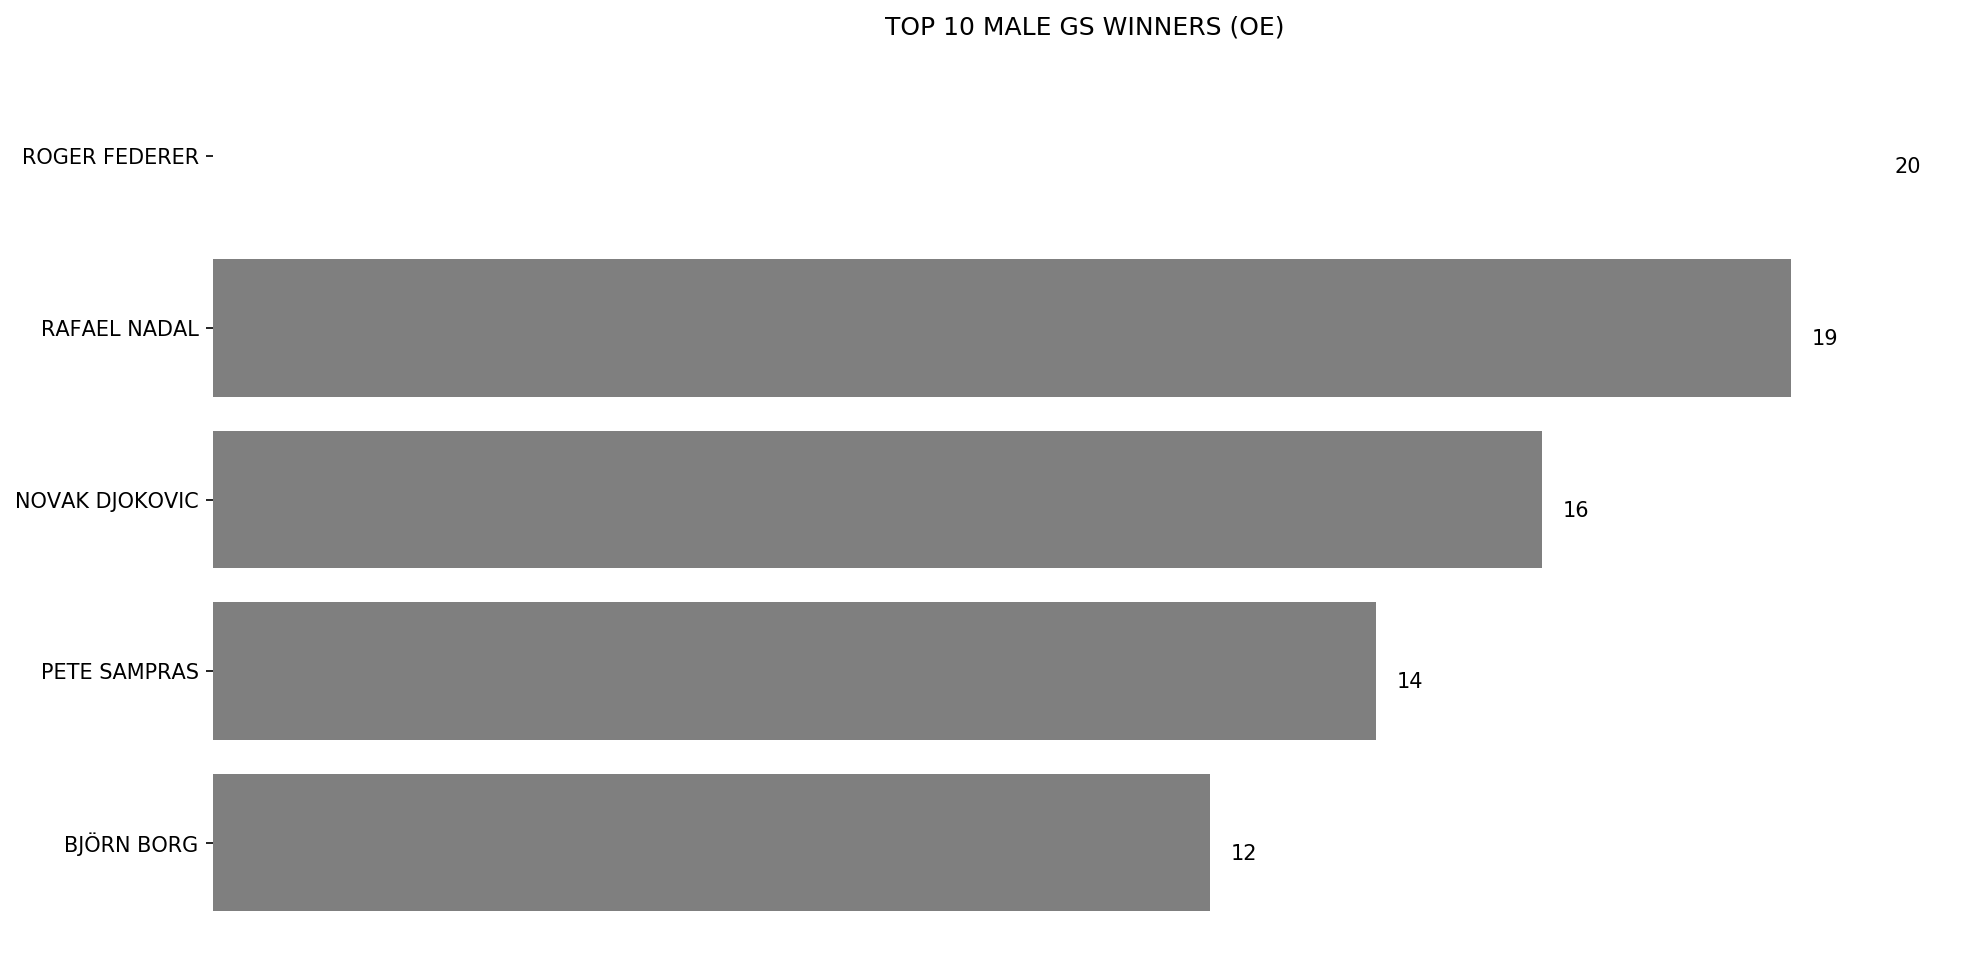

In [18]:
#Tufte
plt.figure(figsize=[15,8],dpi=150)
ax1 = plt.axes(frameon=False)
ax1.axes.get_xaxis().set_visible(False)
objects = men.name
y_pos = np.arange(5)
performance = men['count']

co=[]
for i in performance:
    if i>=20: k='white'
    elif i>=10: k='black'
    else: k='r'
    co.append(k)
        
plt.barh(y_pos, performance, align='center', alpha=0.5, color=co)

def show_num(y,xtick):
    for i, v in enumerate(y):
        plt.text(v+.25, xtick[i]-.1, str(v))
        
show_num(performance, y_pos)

plt.yticks(y_pos,objects)

plt.title('TOP 10 MALE GS WINNERS (OE)')

plt.savefig('menAll.png',transparent=True)

plt.show()

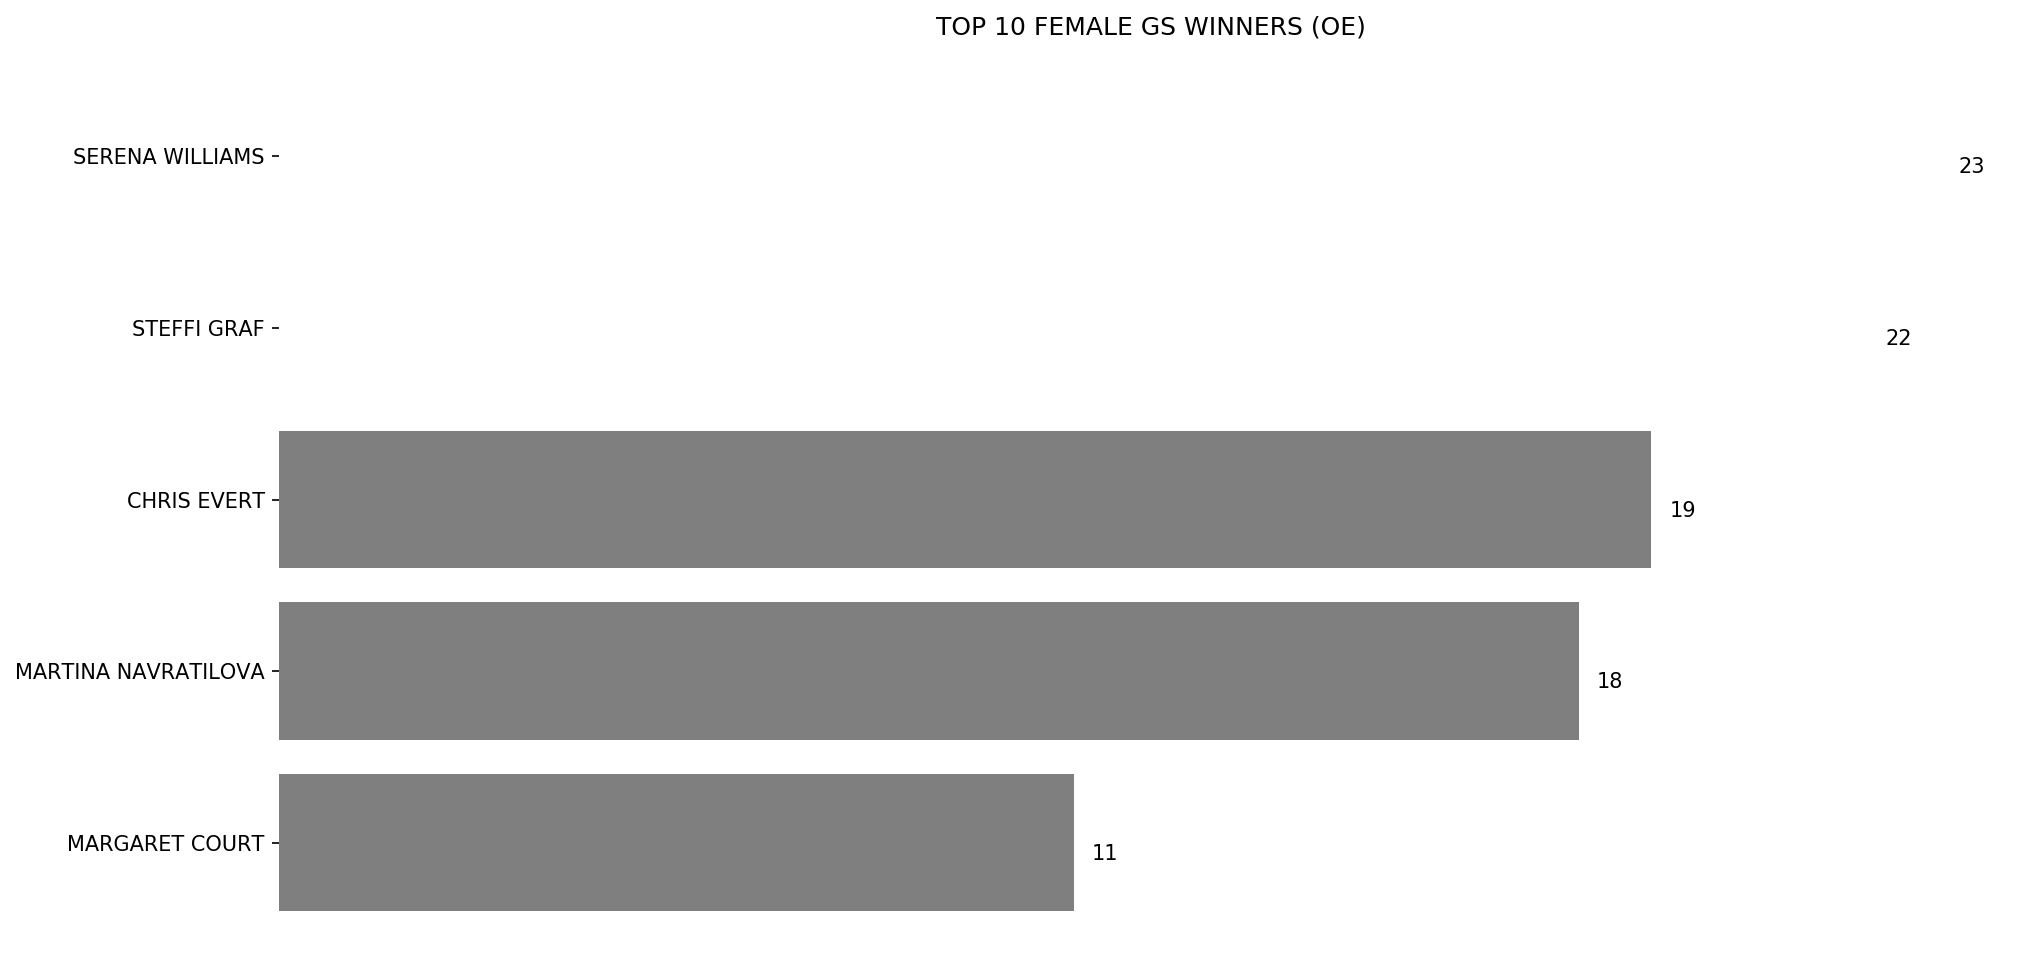

In [19]:
#Tufte
plt.figure(figsize=[15,8],dpi=150)
ax1 = plt.axes(frameon=False)
ax1.axes.get_xaxis().set_visible(False)
objects = women.name
y_pos = np.arange(5)
performance = women['count']

co=[]
for i in performance:
    if i>=20: k='white'
    elif i>=10: k='black'
    else: k='r'
    co.append(k)
        
plt.barh(y_pos, performance, align='center', alpha=0.5, color=co)

def show_num(y,xtick):
    for i, v in enumerate(y):
        plt.text(v+.25, xtick[i]-.1, str(v))
        
show_num(performance, y_pos)

plt.yticks(y_pos,objects)

plt.title('TOP 10 FEMALE GS WINNERS (OE)')

plt.savefig('womenAll.png',transparent=True)

plt.show()

In [51]:
bygs=gs.groupby(['grand_slam','name']).sum()

In [52]:
bygs=bygs.reset_index()
bygs=bygs.drop(columns=['rolling_win_count','year'])

In [53]:
aus=bygs.loc[bygs.grand_slam=='australian_open']
us=bygs.loc[bygs.grand_slam=='us_open']
fr=bygs.loc[bygs.grand_slam=='french_open']
wim=bygs.loc[bygs.grand_slam=='wimbledon']

In [54]:
aus=aus.sort_values(by=['count'],ascending=False)
aus.head(3)

,grand_slam,name,count
36,australian_open,Novak Djokovic,7
43,australian_open,Serena Williams,7
41,australian_open,Roger Federer,6


In [55]:
us=us.sort_values(by=['count'],ascending=False)
us.head(3)

,grand_slam,name,count
117,us_open,Chris Evert,7
150,us_open,Serena Williams,6
145,us_open,Pete Sampras,5


In [56]:
fr=fr.sort_values(by=['count'],ascending=False)
fr.head(3)

,grand_slam,name,count
94,french_open,Rafael Nadal,12
65,french_open,Chris Evert,7
63,french_open,Björn Borg,6


In [57]:
wim=wim.sort_values(by=['count'],ascending=False)
wim.head(3)

,grand_slam,name,count
185,wimbledon,Martina Navratilova,9
194,wimbledon,Roger Federer,8
199,wimbledon,Steffi Graf,7


In [15]:
help(plt.yticks)

Help on function yticks in module matplotlib.pyplot:

yticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the y-axis.
    
    Call signatures::
    
        locs, labels = yticks()           # Get locations and labels
    
        yticks(ticks, [labels], **kwargs)  # Set locations and labels
    
    Parameters
    ----------
    ticks : array_like
        A list of positions at which ticks should be placed. You can pass an
        empty list to disable yticks.
    
    labels : array_like, optional
        A list of explicit labels to place at the given *locs*.
    
    **kwargs
        :class:`.Text` properties can be used to control the appearance of
        the labels.
    
    Returns
    -------
    locs
        An array of label locations.
    labels
        A list of `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``yticks()``) is the pyplot
    equivalent of calling `~.Axes.get_yticks` a

In [104]:
federer=gs.loc[gs.name=='Roger Federer']
serena=gs.loc[gs.name=='Serena Williams']

In [105]:
federer=federer.drop(columns=['rolling_win_count','gender'])
serena=serena.drop(columns=['rolling_win_count','gender'])


In [106]:
seryear=serena.groupby('grand_slam').sum()
seryear=seryear.reset_index()
seryear=seryear.drop(columns='year')
seryear.columns=['grand_slam','Serena Williams']
fedyear=federer.groupby('grand_slam').sum()
fedyear=fedyear.reset_index()
fedyear=fedyear.drop(columns='year')
fedyear.columns=['grand_slam','Roger Federer']

In [129]:
a=pd.merge(fedyear,seryear)

In [132]:
b=a.T
b=b.reset_index()
b.columns=['Player','Australian Open','French Open','US Open','Wimbledon']
b=b.drop(index=0)
b

,Player,Australian Open,French Open,US Open,Wimbledon
1,Roger Federer,6,1,5,8
2,Serena Williams,7,3,6,7


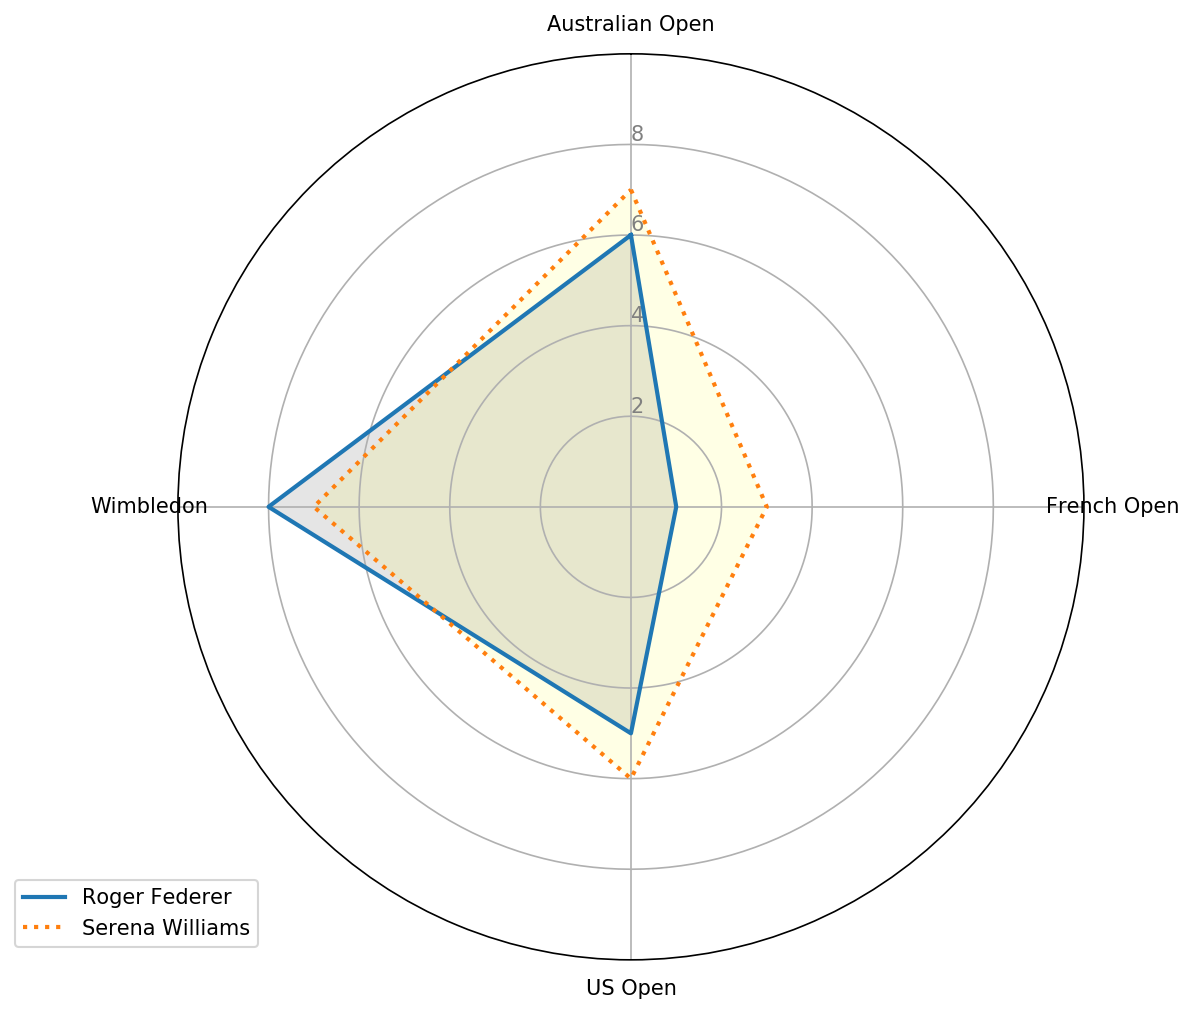

In [144]:
plt.figure(figsize=[10,8],dpi=150)
# ------- PART 1: Create background
 
# number of variable
categories=list(b)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8], ["2","4","6","8"], color="grey")
plt.ylim(0,10)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=b.loc[1].drop('Player').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Roger Federer")
ax.fill(angles, values, 'black', alpha=0.1)
 
# Ind2
values=b.loc[2].drop('Player').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='dotted', label="Serena Williams")
ax.fill(angles, values, 'yellow', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig('spider.png',transparent=True)